In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact, FloatSlider


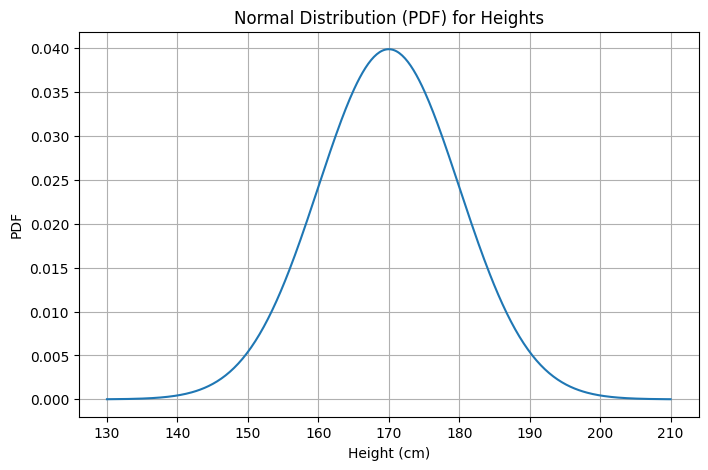

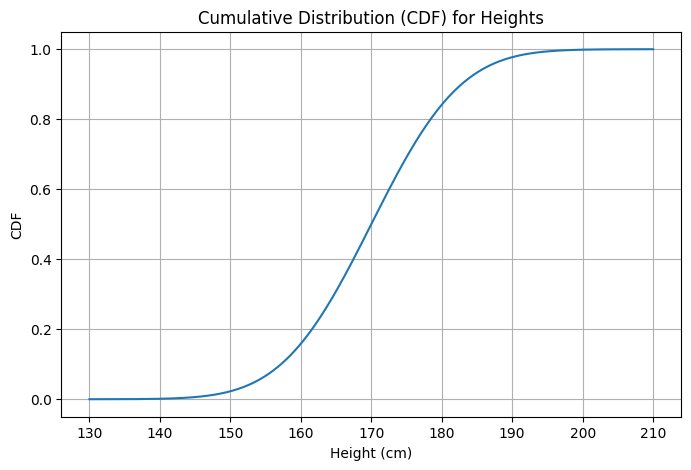

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Example: Heights of adult men
mu = 170   # mean height in cm
sigma = 10 # std deviation

# x range
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)

# PDF and CDF
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# --- Plot PDF ---
plt.figure(figsize=(8, 5))
plt.plot(x, pdf)
plt.title("Normal Distribution (PDF) for Heights")
plt.xlabel("Height (cm)")
plt.ylabel("PDF")
plt.grid(True)
plt.show()

# --- Plot CDF ---
plt.figure(figsize=(8, 5))
plt.plot(x, cdf)
plt.title("Cumulative Distribution (CDF) for Heights")
plt.xlabel("Height (cm)")
plt.ylabel("CDF")
plt.grid(True)
plt.show()


In [3]:
def plot_between(a, b):
    # Sort values to ensure a < b
    low = min(a, b)
    high = max(a, b)

    x = np.linspace(-4, 4, 1000)
    pdf = norm.pdf(x)

    # Compute area between
    prob = norm.cdf(high) - norm.cdf(low)

    plt.figure(figsize=(10, 5))

    # Plot the PDF
    plt.plot(x, pdf, label="Normal PDF (bell curve)", linewidth=2)

    # Shade area between low and high
    mask = (x >= low) & (x <= high)
    plt.fill_between(x[mask], pdf[mask], color='lightgreen', alpha=0.5,
                     label=f"Area = P({low:.2f} < Z < {high:.2f}) = {prob:.4f}")

    # Draw vertical lines
    plt.axvline(low, color='red', linestyle='--', linewidth=2)
    plt.axvline(high, color='red', linestyle='--', linewidth=2)

    plt.title("Probability Between Two Z-values")
    plt.xlabel("z-value")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.legend()
    plt.show()


interact(
    plot_between,
    a=FloatSlider(min=-3.5, max=3.5, step=0.01, value=-1),
    b=FloatSlider(min=-3.5, max=3.5, step=0.01, value=1)
);


interactive(children=(FloatSlider(value=-1.0, description='a', max=3.5, min=-3.5, step=0.01), FloatSlider(valu…

### Probability Problem: Normally Distributed Lifetimes of Mice

A research scientist reports that mice will live an **average of 40 months** when their diets are sharply restricted and then enriched with vitamins and proteins.

Assuming that the lifetimes of such mice are **normally distributed** with a **standard deviation of 6.3 months**, find the probability that a given mouse will live:

1. **More than 32 months**
2. **Less than 28 months**
3. **Between 37 and 49 months**


In [4]:
from scipy.stats import norm

mu = 40.0
sigma = 6.3

def cdf(x):
    z = (x - mu) / sigma
    return norm.cdf(z)

# (a) P(X > 32)
p_a = 1 - cdf(32)

# (b) P(X < 28)
p_b = cdf(28)

# (c) P(37 < X < 49)
p_c = cdf(49) - cdf(37)

print("(a)", p_a)
print("(b)", p_b)
print("(c)", p_c)


(a) 0.8979294116249796
(b) 0.028405513967363783
(c) 0.6064669325494922


### Problem: Normal Distribution – Piston Ring Diameters

The finished inside diameter of a piston ring is **normally distributed** with:

- Mean (μ) = **10 cm**
- Standard deviation (σ) = **0.03 cm**

Answer the following:

---

#### **(a)**  
What proportion of rings will have inside diameters **exceeding 10.075 cm**?

---

#### **(b)**  
What is the probability that a piston ring will have an inside diameter **between 9.97 cm and 10.03 cm**?

---

#### **(c)**  
Below what inside diameter value will **15%** of the piston rings fall?

---


RESULTS
-----------------------------------
(a) P(X > 10.075) = 0.006210
(b) P(9.97 < X < 10.03) = 0.682689
(c) Diameter value at 15th percentile = 9.968907 cm


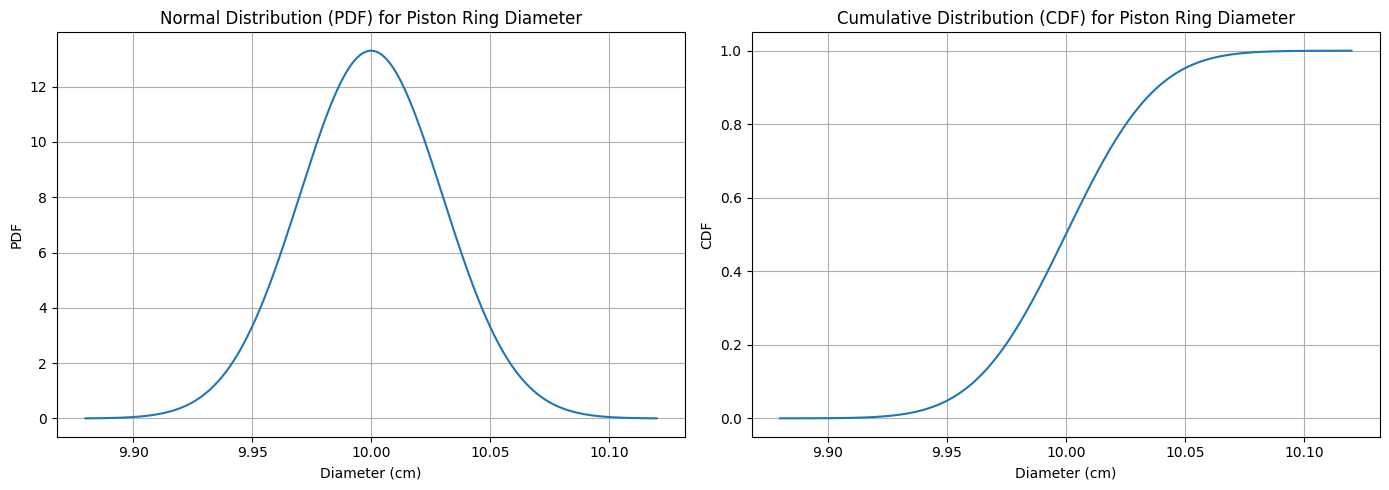

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ----------------------------------------
# Given parameters
# ----------------------------------------
mu = 10          # mean diameter
sigma = 0.03     # std deviation

# ----------------------------------------
# Create x-range for PDF and CDF plots
# ----------------------------------------
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# ----------------------------------------
# Solve (a), (b), (c)
# ----------------------------------------

# (a) P(X > 10.075)
p_a = 1 - norm.cdf(10.075, mu, sigma)

# (b) P(9.97 < X < 10.03)
p_b = norm.cdf(10.03, mu, sigma) - norm.cdf(9.97, mu, sigma)

# (c) Find value below which 15% of rings fall
p_c = norm.ppf(0.15, mu, sigma)

# ----------------------------------------
# Print results
# ----------------------------------------
print("RESULTS")
print("-----------------------------------")
print(f"(a) P(X > 10.075) = {p_a:.6f}")
print(f"(b) P(9.97 < X < 10.03) = {p_b:.6f}")
print(f"(c) Diameter value at 15th percentile = {p_c:.6f} cm")

# ----------------------------------------
# Plot PDF and CDF side by side
# ----------------------------------------
plt.figure(figsize=(14, 5))

# PDF Plot
plt.subplot(1, 2, 1)
plt.plot(x, pdf)
plt.title("Normal Distribution (PDF) for Piston Ring Diameter")
plt.xlabel("Diameter (cm)")
plt.ylabel("PDF")
plt.grid(True)

# CDF Plot
plt.subplot(1, 2, 2)
plt.plot(x, cdf)
plt.title("Cumulative Distribution (CDF) for Piston Ring Diameter")
plt.xlabel("Diameter (cm)")
plt.ylabel("CDF")
plt.grid(True)

plt.tight_layout()
plt.show()


### 📘 Normal Distribution Problem – Lawyer’s Commute Time

A lawyer commutes daily from his suburban home to his midtown office.  
The **one-way trip time** is normally distributed with:

- **Mean (μ)** = 24 minutes  
- **Standard deviation (σ)** = 3.8 minutes  

Using this information, answer the following:

---

#### **(a)**  
What is the probability that a trip will take **at least 30 minutes (½ hour)**?

---

#### **(b)**  
The office opens at **9:00 A.M.**, and the lawyer leaves home at **8:45 A.M.** daily.  
What percentage of the time is he **late for work**?

---

#### **(c)**  
If he leaves home at **8:35 A.M.**, and coffee is served at the office from **8:50 A.M. to 9:00 A.M.**,  
what is the probability that he **misses coffee**?

---

#### **(d)**  
Find the trip time above which we find the **slowest 15%** of all trips.

---

#### **(e)**  
Find the probability that  2 of the next 3 trips will
take at least 1/2 hour.


---


RESULTS
----------------------------------------
(a) P(X ≥ 30) = 0.057174
(b) P(late) = 0.991068
(c) P(misses coffee) = 0.405147
(d) Slowest 15% trips exceed = 27.9384 minutes
(e) P(exactly 2 of next 3 ≥ 30 min) = 0.009246


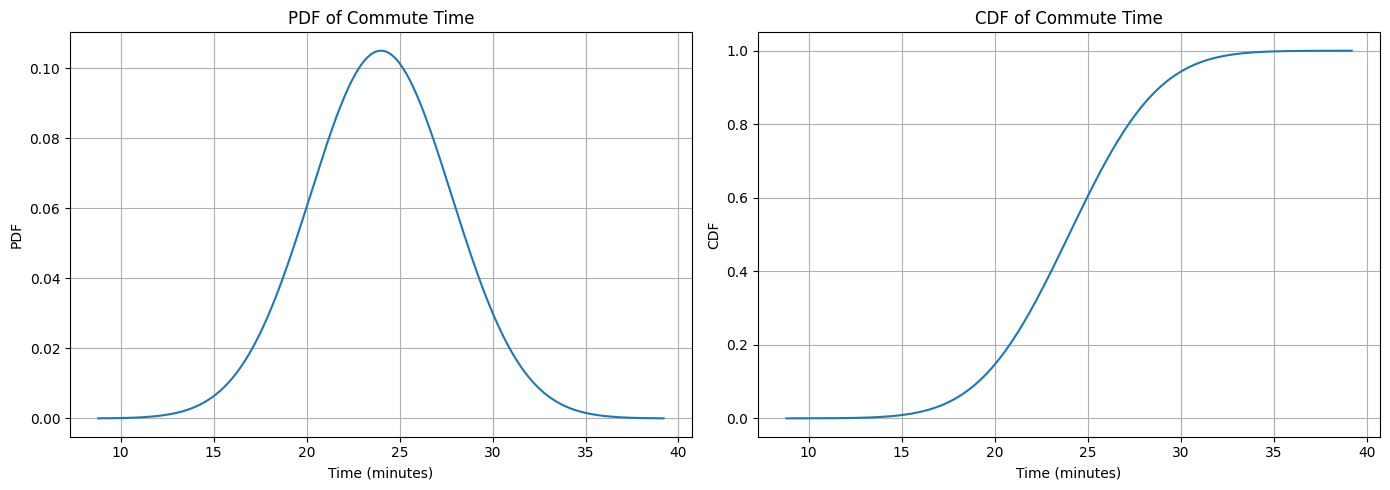

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import comb

# -----------------------------------------------------
# Given distribution parameters
# -----------------------------------------------------
mu = 24         # mean commute time (minutes)
sigma = 3.8     # standard deviation (minutes)

# -----------------------------------------------------
# Create x-range and compute PDF/CDF
# -----------------------------------------------------
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# -----------------------------------------------------
# (a) Probability trip takes at least 30 minutes
# -----------------------------------------------------
p_a = 1 - norm.cdf(30, mu, sigma)

# -----------------------------------------------------
# (b) Probability he is late (must arrive by 9:00)
# Leaves at 8:45 → must arrive in 15 minutes
# -----------------------------------------------------
p_b = 1 - norm.cdf(15, mu, sigma)

# -----------------------------------------------------
# (c) Probability he misses coffee
# Coffee window: 8:50 to 9:00 → trip must be between 15 and 25 minutes
# Misses coffee if trip < 15 OR trip > 25
# -----------------------------------------------------
p_c = norm.cdf(15, mu, sigma) + (1 - norm.cdf(25, mu, sigma))

# -----------------------------------------------------
# (d) Threshold for slowest 15% of trips
# Find 85th percentile
# -----------------------------------------------------
p_d = norm.ppf(0.85, mu, sigma)

# -----------------------------------------------------
# (e) Probability that EXACTLY 2 of next 3 trips take ≥ 30 minutes
# Binomial: n = 3, k = 2, p = P(trip ≥ 30)
# -----------------------------------------------------
p_single = p_a
p_e = comb(3, 2) * (p_single**2) * (1 - p_single)

# -----------------------------------------------------
# Print all results
# -----------------------------------------------------
print("RESULTS")
print("----------------------------------------")
print(f"(a) P(X ≥ 30) = {p_a:.6f}")
print(f"(b) P(late) = {p_b:.6f}")
print(f"(c) P(misses coffee) = {p_c:.6f}")
print(f"(d) Slowest 15% trips exceed = {p_d:.4f} minutes")
print(f"(e) P(exactly 2 of next 3 ≥ 30 min) = {p_e:.6f}")

# -----------------------------------------------------
# Plot PDF and CDF side by side
# -----------------------------------------------------
plt.figure(figsize=(14, 5))

# PDF Plot
plt.subplot(1, 2, 1)
plt.plot(x, pdf)
plt.title("PDF of Commute Time")
plt.xlabel("Time (minutes)")
plt.ylabel("PDF")
plt.grid(True)

# CDF Plot
plt.subplot(1, 2, 2)
plt.plot(x, cdf)
plt.title("CDF of Commute Time")
plt.xlabel("Time (minutes)")
plt.ylabel("CDF")
plt.grid(True)

plt.tight_layout()
plt.show()
